<a href="https://colab.research.google.com/github/Syilun/face_people_recognization/blob/master/01face_detection_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 8.0MB/s 


In [3]:
import mtcnn
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pprint import pprint

In [8]:
path = '/content/drive/My Drive/Tibame AI/智揚/week10/face_detection/5celeb/data/*/*/*.jpg'

In [9]:
img_paths = glob(path)
len(glob(path))

118

In [10]:
# create the detector, using default weights
detector = MTCNN()

In [11]:
img = cv2.imread(img_paths[0])[:,:,::-1] # read image
# detect face
results = detector.detect_faces(img)
pprint(results)


[{'box': [118, -10, 90, 124],
  'confidence': 0.999944806098938,
  'keypoints': {'left_eye': (142, 39),
                'mouth_left': (156, 87),
                'mouth_right': (188, 80),
                'nose': (169, 61),
                'right_eye': (181, 30)}}]


(57, 22) (140, 139) (200, 200, 3)


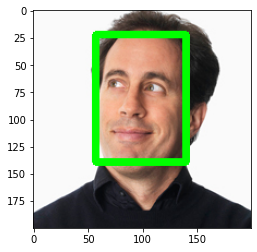

In [16]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height
print((x1, y1), (x2, y2), img.shape)
plt.imshow(img)

118 208 -10 114


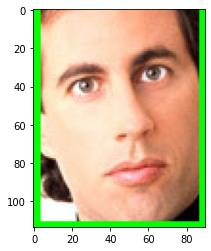

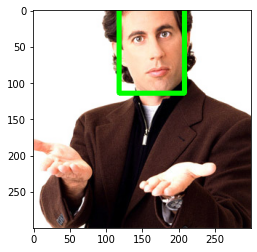

94 209 10 175


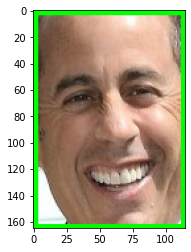

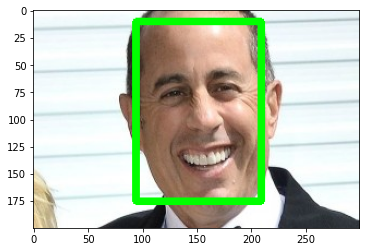

91 199 56 208


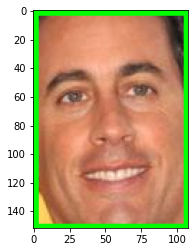

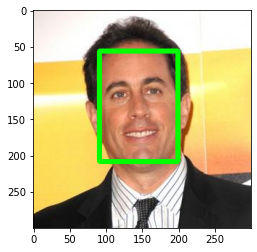

79 145 22 116


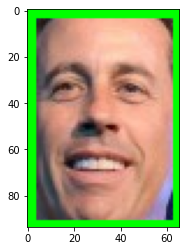

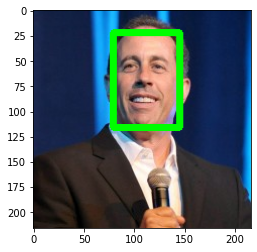

57 140 22 139


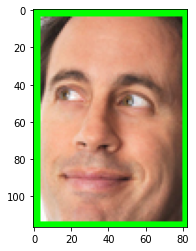

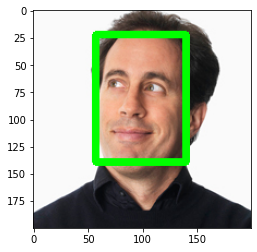

In [18]:
for path in img_paths[:5]:
    img = cv2.imread(path)[:,:,::-1] # read image
    # detect face
    results = detector.detect_faces(img)
    # extract the bounding box from the first face
    assert len(results) >= 1
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    print(x1, x2, y1,y2)
    # draw bbox
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5).get()
    # crop face
    patch = img[max(y1, 0):y2, max(x1, 0):x2]
    # show image
    plt.imshow(patch)
    plt.show()
    plt.imshow(img)
    plt.show()